In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u

In [10]:
def extractData(filePath, fileName):
    ''' Extracting captured data from the lab1 npz array from SDR'''
    raw_data = np.load(filePath + fileName)
    try:
        time_data, sample_rate, jd = raw_data['time_data'][1:], raw_data['sample_rate'], raw_data['jd'] 
        return time_data, sample_rate, jd
    except Exception as e: 
        return [raw_data['arr_0'][0], 'Placeholder for Sample Rate']

In [11]:
def LinearMode2(x,m):
    return m*x

In [12]:
filepath9 = "../../../ugastro/Lab2Data/Section9/Section9_2/"

s10 = 'Mar3_10mV.npz'
s15 = 'Mar3_15mV.npz'
s20 = 'Mar3_20mV.npz'
s25 = 'Mar3_25mV.npz'
s30 = 'Mar3_30mV.npz'
s35 = 'Mar3_35mV.npz'
s40 = 'Mar3_40mV.npz'
s45 = 'Mar3_45mV.npz'
s50 = 'Mar3_50mV.npz'
s55 = 'Mar3_55mV.npz'
s60 = 'Mar3_60mV.npz'
s65 = 'Mar3_65mV.npz'

l10 = 'Mar3_longcable_10mV.npz'
l15 = 'Mar3_longcable_15mV.npz'
l20 = 'Mar3_longcable_20mV.npz'
l25 = 'Mar3_longcable_25mV.npz'
l30 = 'Mar3_longcable_30mV.npz'
l35 = 'Mar3_longcable_35mV.npz'
l40 = 'Mar3_longcable_40mV.npz'
l45 = 'Mar3_longcable_45mV.npz'
l50 = 'Mar3_longcable_50mV.npz'
l55 = 'Mar3_longcable_55mV.npz'
l60 = 'Mar3_longcable_60mV.npz'
l65 = 'Mar3_longcable_65mV.npz'

In [13]:
s10_td, x, y = extractData(filepath9,s10)
s15_td, x, y = extractData(filepath9,s15)
s20_td, x, y = extractData(filepath9,s20)
s25_td, x, y = extractData(filepath9,s25)
s30_td, x, y = extractData(filepath9,s30)
s35_td, x, y = extractData(filepath9,s35)
s40_td, x, y = extractData(filepath9,s40)
s45_td, x, y = extractData(filepath9,s45)
s50_td, x, y = extractData(filepath9,s50)
s55_td, x, y = extractData(filepath9,s55)
s60_td, x, y = extractData(filepath9,s60)
s65_td, x, y = extractData(filepath9,s65)

l10_td, x, y = extractData(filepath9,l10)
l15_td, x, y = extractData(filepath9,l15)
l20_td, x, y = extractData(filepath9,l20)
l25_td, x, y = extractData(filepath9,l25)
l30_td, x, y = extractData(filepath9,l30)
l35_td, x, y = extractData(filepath9,l35)
l40_td, x, y = extractData(filepath9,l40)
l45_td, x, y = extractData(filepath9,l45)
l55_td, x, y = extractData(filepath9,l55)
l60_td, x, y = extractData(filepath9,l60)
l65_td, x, y = extractData(filepath9,l65)

In [14]:
s_td = np.array([s10_td,s15_td,s20_td,s25_td,s30_td,s35_td,s40_td,s45_td,s50_td,s55_td,s60_td,s65_td])
s_mv = np.array([10,15,20,25,30,35,40,45,50,55,60,65])
l_td = np.array([l10_td,l15_td,l20_td,l25_td,l30_td,l35_td,l40_td,l45_td,l55_td,l60_td,l65_td])
l_mv = np.array([10,15,20,25,30,35,40,45,55,60,65])

In [15]:
filepath9 = "../../../ugastro/Lab2Data/Section9/Section9_3/"

bp_1 = 'Mar3_bandpass_10mV.npz'
bp_2 = 'Mar3_bandpass_20mV.npz'
bp_3 = 'Mar3_bandpass_30mV.npz'
bp_4 = 'Mar3_bandpass_40mV.npz'
bp_5 = 'Mar3_bandpass_50mV.npz'
bp_6 = 'Mar3_bandpass_60mV.npz'
bp_7 = 'Mar3_bandpass_70mV.npz'
bp_8 = 'Mar3_bandpass_80mV.npz'
bp_9 = 'Mar3_bandpass_90mV.npz'
bp_10 = 'Mar3_bandpass_100mV.npz'

In [16]:
bp1_td, x, y = extractData(filepath9, bp_1)
bp2_td, x, y = extractData(filepath9, bp_2)
bp3_td, x, y = extractData(filepath9, bp_3)
bp4_td, x, y = extractData(filepath9, bp_4)
bp5_td, x, y = extractData(filepath9, bp_5)
bp6_td, x, y = extractData(filepath9, bp_6)
bp7_td, x, y = extractData(filepath9, bp_7)
bp8_td, x, y = extractData(filepath9, bp_8)
bp9_td, x, y = extractData(filepath9, bp_9)
bp10_td, x, y = extractData(filepath9, bp_10)

In [17]:
bp_td = np.array([bp1_td,bp2_td,bp3_td,bp4_td,bp5_td,bp6_td,bp7_td,bp8_td,bp9_td,bp10_td])
bp_mv = np.array([10,20,30,40,50,60,70,80,90,100])

In [18]:
def voltPerCount(time_datas, volt_data, p0):
    
    count = np.array([np.percentile(np.abs(time_data[:,:,0].flatten()), 95) for time_data in time_datas])
    popt, covt = curve_fit(LinearModel2,count,volt_data)
    errors = np.sqrt(np.diag(covt))
    plt.scatter(count, volt_data)
    plt.plot(count, LinearModel2(count, popt[0]), label = f'HmmV/Count= {popt[0]:.2f} $\pm$ {errors[0]:.2f}')
    plt.xlabel('Count')
    plt.ylabel('Volts (Unknown Units)')
    plt.legend()
    return errors

In [35]:
def LinearModel2(x, a):
    return a * x

In [36]:
countS = np.array([np.percentile(np.abs(time_data[:,:,0].flatten()), 95) for time_data in s_td])
countL = np.array([np.percentile(np.abs(time_data[:,:,0].flatten()), 95) for time_data in l_td])
countBP = np.array([np.percentile(np.abs(time_data[:,:,0].flatten()), 95) for time_data in bp_td])

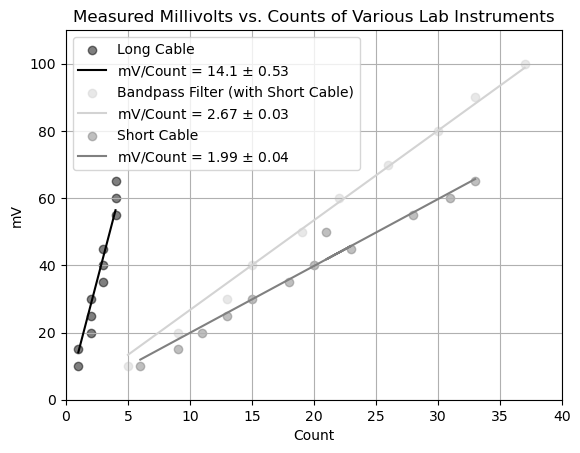

In [63]:
plt.scatter(countL, l_mv, color = 'black', alpha = 0.5, label = "Long Cable")
plt.plot(countL, LinearModel2(countL, 14.10), color = 'black', label = f"mV/Count = 14.1 $\pm$ 0.53")
plt.scatter(countBP, bp_mv, color = '#D3D3D3', alpha = 0.5, label = "Bandpass Filter (with Short Cable)")
plt.plot(countBP, LinearModel2(countBP, 2.67), color = '#D3D3D3', label = f"mV/Count = 2.67 $\pm$ 0.03")
plt.scatter(countS, s_mv, color = 'grey', alpha = 0.5, label = "Short Cable")
plt.plot(countS, LinearModel2(countS, 1.99), color = 'grey', label = f"mV/Count = 1.99 $\pm$ 0.04")
plt.ylabel("mV")
plt.xlabel("Count")
plt.grid()
plt.ylim(0,110)
plt.xlim(0,40)
plt.legend()
plt.title('Measured Millivolts vs. Counts of Various Lab Instruments')

plt.savefig("mVCountAll.png", dpi=300, bbox_inches='tight')